In [1]:
import torch

# 当前安装的 PyTorch 库的版本
print(torch.__version__)
# 检查 CUDA 是否可用，即你的系统有 NVIDIA 的 GPU
print(torch.cuda.is_available())

2.5.1+cu124
True


In [2]:
x=torch.rand(5,3)
x

tensor([[0.5986, 0.3359, 0.2690],
        [0.8979, 0.8169, 0.7561],
        [0.4883, 0.4237, 0.9951],
        [0.5800, 0.1941, 0.7212],
        [0.1232, 0.0128, 0.5725]])

In [3]:
device=torch.device("cuda"if torch.cuda.is_available()else"cpu")
d = torch.randn(2,3,device=device)
d

tensor([[ 0.6702, -0.5782,  0.0702],
        [ 0.6502,  1.1866,  0.4220]], device='cuda:0')

In [6]:
g=torch.randn(3,2)
print(g.device)
print(g.t()) #转置

cpu
tensor([[ 0.8183,  1.3460, -0.2750],
        [ 0.0728, -0.1461, -0.5253]])


In [7]:
# 创建一个需要梯度的张量
tensor_requires_grad = torch.tensor([1.0], requires_grad=True)

# 进行一些操作
tensor_result = tensor_requires_grad * 2

# 计算梯度
tensor_result.backward()
print(tensor_requires_grad.grad)  # 输出梯度

tensor([2.])


In [8]:
# 创建一个需要计算梯度的张量
x = torch.randn(2, 2, requires_grad=True)
print(x)

# 执行某些操作
y = x + 2
z = y * y * 3
out = z.mean()

print(out)

tensor([[-0.2473,  0.2310],
        [ 0.7336, -0.5210]], requires_grad=True)
tensor(13.2819, grad_fn=<MeanBackward0>)


In [9]:
out.backward()
print(x.grad)

tensor([[2.6290, 3.3465],
        [4.1004, 2.2185]])


In [10]:
import torch.nn as nn
import torch.optim as optim

In [11]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN,self).__init__()
        self.fc1=nn.Linear(2,2)
        self.fc2=nn.Linear(2,1)

    def forward(self,x):
        x=torch.relu(self.fc1(x))
        x=self.fc2(x)
        return x

model=SimpleNN()
print(model)

SimpleNN(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)


In [12]:
x =torch.randn(1,2)
output=model(x)
print(output)

criterion=nn.MSELoss()

target = torch.randn(1,1)
loss=criterion(output,target)
print(loss)

tensor([[-0.3252]], grad_fn=<AddmmBackward0>)
tensor(0.3629, grad_fn=<MseLossBackward0>)


In [13]:
optimizer = optim.Adam(model.parameters(),lr=0.001)

optimizer.zero_grad()
loss.backward()
optimizer.step()

In [16]:
import time
# 假设我们有训练数据 X 和 Y
X = torch.randn(10, 2)  # 10 个样本，2 个特征
Y = torch.randn(10, 1)  # 10 个目标值

start_time=time.time()
# 训练循环
for epoch in range(100):  # 训练 100 轮
    optimizer.zero_grad()  # 清空之前的梯度
    output = model(X)  # 前向传播
    loss = criterion(output, Y)  # 计算损失
    loss.backward()  # 反向传播
    optimizer.step()  # 更新参数
   
    # 每 10 轮输出一次损失
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/100], Loss: {loss.item():.4f}')

end_time=time.time()
total_time=end_time-start_time
print(f"training time:{total_time:.5f}seconds")

Epoch [10/100], Loss: 1.2564
Epoch [20/100], Loss: 1.2092
Epoch [30/100], Loss: 1.1632
Epoch [40/100], Loss: 1.1224
Epoch [50/100], Loss: 1.0868
Epoch [60/100], Loss: 1.0555
Epoch [70/100], Loss: 1.0276
Epoch [80/100], Loss: 1.0023
Epoch [90/100], Loss: 0.9792
Epoch [100/100], Loss: 0.9577
training time:0.03254seconds


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import time

# 1. 定义一个简单的神经网络模型
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 2)  # 输入层到隐藏层
        self.fc2 = nn.Linear(2, 1)  # 隐藏层到输出层
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))  # ReLU 激活函数
        x = self.fc2(x)
        return x

# 2. 创建模型实例
model = SimpleNN()

# 3. 定义损失函数和优化器
criterion = nn.MSELoss()  # 均方误差损失函数
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam 优化器

# 4. 假设我们有训练数据 X 和 Y
X = torch.randn(10, 2)  # 10 个样本，2 个特征
Y = torch.randn(10, 1)  # 10 个目标值

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 将模型移动到设备
model.to(device)

# 将数据移动到设备
X = X.to(device)
Y = Y.to(device)

start_time=time.time()
# 5. 训练循环
for epoch in range(100):  # 训练 100 轮
    optimizer.zero_grad()  # 清空之前的梯度
    output = model(X)  # 前向传播
    loss = criterion(output, Y)  # 计算损失
    loss.backward()  # 反向传播
    optimizer.step()  # 更新参数
    
    # 每 10 轮输出一次损失
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/100], Loss: {loss.item():.4f}')

end_time=time.time()
total_time=end_time-start_time
print(f"training time:{total_time:.5f}seconds")

Epoch [10/100], Loss: 1.3787
Epoch [20/100], Loss: 1.3516
Epoch [30/100], Loss: 1.3270
Epoch [40/100], Loss: 1.3042
Epoch [50/100], Loss: 1.2833
Epoch [60/100], Loss: 1.2640
Epoch [70/100], Loss: 1.2464
Epoch [80/100], Loss: 1.2302
Epoch [90/100], Loss: 1.2153
Epoch [100/100], Loss: 1.2016
training time:0.13370seconds


In [20]:
x=torch.eye(3)
x

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

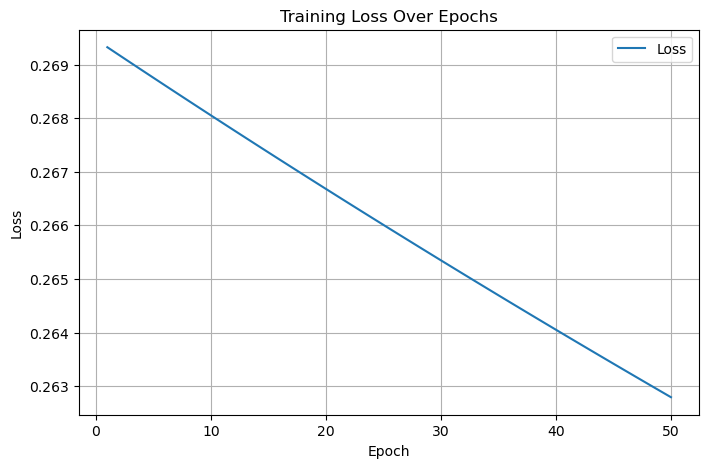

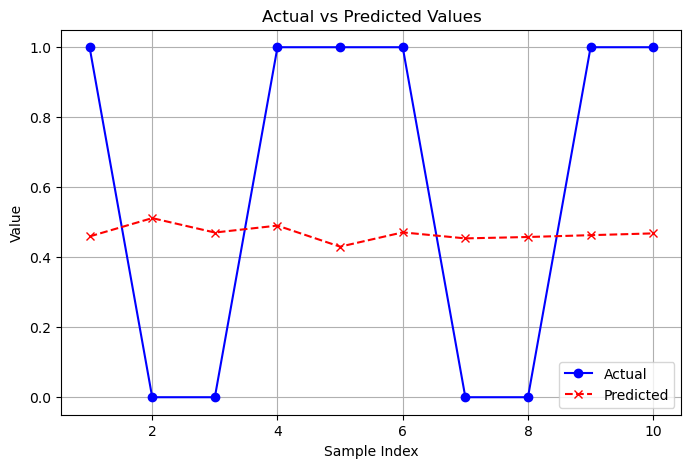

In [21]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 定义输入层大小、隐藏层大小、输出层大小和批量大小
n_in, n_h, n_out, batch_size = 10, 5, 1, 10

# 创建虚拟输入数据和目标数据
x = torch.randn(batch_size, n_in)  # 随机生成输入数据
y = torch.tensor([[1.0], [0.0], [0.0], 
                  [1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0]])  # 目标输出数据

# 创建顺序模型，包含线性层、ReLU激活函数和Sigmoid激活函数
model = nn.Sequential(
    nn.Linear(n_in, n_h),  # 输入层到隐藏层的线性变换
    nn.ReLU(),            # 隐藏层的ReLU激活函数
    nn.Linear(n_h, n_out),  # 隐藏层到输出层的线性变换
    nn.Sigmoid()           # 输出层的Sigmoid激活函数
)

# 定义均方误差损失函数和随机梯度下降优化器
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # 学习率为0.01

# 用于存储每轮的损失值
losses = []

# 执行梯度下降算法进行模型训练
for epoch in range(50):  # 迭代50次
    y_pred = model(x)  # 前向传播，计算预测值
    loss = criterion(y_pred, y)  # 计算损失
    losses.append(loss.item())  # 记录损失值

    optimizer.zero_grad()  # 清零梯度
    loss.backward()  # 反向传播，计算梯度
    optimizer.step()  # 更新模型参数

# 可视化损失变化曲线
plt.figure(figsize=(8, 5))
plt.plot(range(1, 51), losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()

# 可视化预测结果与实际目标值对比
y_pred_final = model(x).detach().numpy()  # 最终预测值
y_actual = y.numpy()  # 实际值

plt.figure(figsize=(8, 5))
plt.plot(range(1, batch_size + 1), y_actual, 'o-', label='Actual', color='blue')
plt.plot(range(1, batch_size + 1), y_pred_final, 'x--', label='Predicted', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid()
plt.show()

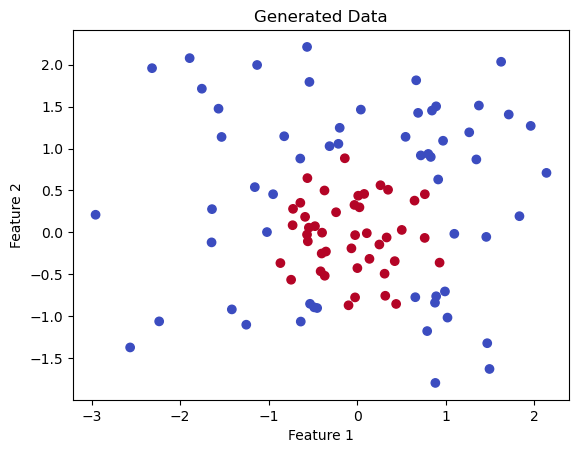

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 生成一些随机数据
n_samples = 100
data = torch.randn(n_samples, 2)  # 生成 100 个二维数据点
labels = (data[:, 0]**2 + data[:, 1]**2 < 1).float().unsqueeze(1)  # 点在圆内为1，圆外为0

# 可视化数据
plt.scatter(data[:, 0], data[:, 1], c=labels.squeeze(), cmap='coolwarm')
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [23]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # 定义神经网络的层
        self.fc1 = nn.Linear(2, 4)  # 输入层有 2 个特征，隐藏层有 4 个神经元
        self.fc2 = nn.Linear(4, 1)  # 隐藏层输出到 1 个神经元（用于二分类）
        self.sigmoid = nn.Sigmoid()  # 二分类激活函数

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # 使用 ReLU 激活函数
        x = self.sigmoid(self.fc2(x))  # 输出层使用 Sigmoid 激活函数
        return x

# 实例化模型
model = SimpleNN()

# 定义二分类的损失函数和优化器
criterion = nn.BCELoss()  # 二元交叉熵损失
optimizer = optim.SGD(model.parameters(), lr=0.1)  # 使用随机梯度下降优化器

Epoch [10/100], Loss: 0.5409
Epoch [20/100], Loss: 0.5322
Epoch [30/100], Loss: 0.5243
Epoch [40/100], Loss: 0.5169
Epoch [50/100], Loss: 0.5100
Epoch [60/100], Loss: 0.5040
Epoch [70/100], Loss: 0.4985
Epoch [80/100], Loss: 0.4934
Epoch [90/100], Loss: 0.4885
Epoch [100/100], Loss: 0.4840


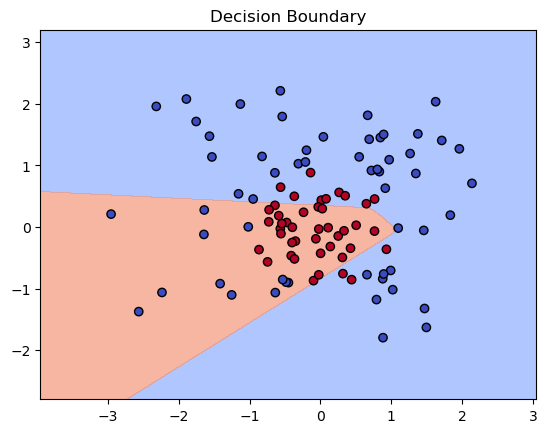

In [25]:
# 训练
epochs = 100
for epoch in range(epochs):
    # 前向传播
    outputs = model(data)
    loss = criterion(outputs, labels)

    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 每 10 轮打印一次损失
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# 可视化决策边界
def plot_decision_boundary(model, data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.1), torch.arange(y_min, y_max, 0.1), indexing='ij')
    grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
    predictions = model(grid).detach().numpy().reshape(xx.shape)
    plt.contourf(xx, yy, predictions, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.7)
    plt.scatter(data[:, 0], data[:, 1], c=labels.squeeze(), cmap='coolwarm', edgecolors='k')
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(model, data)

In [3]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# 自定义数据集
class MyDataset(Dataset):
    def __init__(self, data, labels):
        # 数据初始化
        self.data = data
        self.labels = labels

    def __len__(self):
        # 返回数据集大小
        return len(self.data)

    def __getitem__(self, idx):
        # 按索引返回数据和标签
        sample = self.data[idx]
        label = self.labels[idx]
        return sample, label

# 生成示例数据
data = torch.randn(100, 5)  # 100 个样本，每个样本有 5 个特征
labels = torch.randint(0, 2, (100,))  # 100 个标签，取值为 0 或 1

# 实例化数据集
dataset = MyDataset(data, labels)
# 实例化 DataLoader
dataloader = DataLoader(dataset, batch_size=10, shuffle=True, num_workers=0)

# 遍历 DataLoader
for batch_idx, (batch_data, batch_labels) in enumerate(dataloader):
    print(f"批次 {batch_idx + 1}")
    print("数据:", batch_data)
    print("标签:", batch_labels)
    if batch_idx > 2:  # 仅显示前 3 个批次
        break


#一维张量的形状为（lenth,），不能再添一个1在逗号后面，会变成二维张量

批次 1
数据: tensor([[ 0.6159,  1.4530,  0.7630, -0.8370,  0.8339],
        [ 0.6276,  1.6699,  0.5992,  1.2470,  1.6101],
        [-0.6902,  0.2827, -1.9220, -0.6168, -0.9449],
        [-1.1825, -0.7703, -1.6897,  0.4693, -0.0863],
        [ 0.6189,  0.2053,  0.4219,  1.4835,  0.7418],
        [-0.4154, -0.8608,  2.2022, -2.3709,  0.7273],
        [ 0.7009, -0.5753, -1.0658, -0.8732,  1.1364],
        [-0.5393,  0.1728, -1.2373, -1.0629,  1.9739],
        [-0.5586,  1.6131, -1.3375,  1.2186, -0.5175],
        [-0.0299,  2.7353, -1.0778, -2.1207, -1.4226]])
标签: tensor([0, 1, 0, 1, 1, 0, 1, 0, 1, 0])
批次 2
数据: tensor([[-0.1083,  0.9281,  0.3099,  0.9228,  0.3398],
        [-2.1233, -0.9646,  0.5408,  0.3034, -1.9250],
        [-0.6209, -0.7418, -0.6819, -0.5568, -1.1192],
        [ 0.4067, -0.0657, -0.6652,  0.1514, -0.4251],
        [-1.0703,  0.0784,  0.9296, -0.0212, -2.4740],
        [-0.2964, -0.4063, -1.0800, -1.2568, -0.1300],
        [-1.1096,  0.8594, -0.5307, -0.0629, -0.4574],
   

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms,datasets

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),  # 转为张量
    transforms.Normalize((0.5,), (0.5,))  # 归一化到 [-1, 1]
])

# 加载 MNIST 数据集
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [4]:
# 2. 定义 CNN 模型
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # 定义卷积层
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)  # 输入1通道，输出32通道
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)  # 输入32通道，输出64通道
        # 定义全连接层
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # 展平后输入到全连接层
        self.fc2 = nn.Linear(128, 10)  # 10 个类别

    def forward(self, x):
        x = F.relu(self.conv1(x))  # 第一层卷积 + ReLU
        x = F.max_pool2d(x, 2)     # 最大池化
        x = F.relu(self.conv2(x))  # 第二层卷积 + ReLU
        x = F.max_pool2d(x, 2)     # 最大池化
        x = x.view(-1, 64 * 7 * 7) # 展平
        x = F.relu(self.fc1(x))    # 全连接层 + ReLU
        x = self.fc2(x)            # 最后一层输出
        return x

# 创建模型实例
model = SimpleCNN()

# 3. 定义损失函数与优化器
criterion = nn.CrossEntropyLoss()  # 多分类交叉熵损失
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [5]:
num_epochs = 5
model.train()  # 设置模型为训练模式

for epoch in range(num_epochs):
    total_loss = 0
    for images, labels in train_loader:
        outputs = model(images)  # 前向传播
        loss = criterion(outputs, labels)  # 计算损失

        optimizer.zero_grad()  # 清空梯度
        loss.backward()  # 反向传播
        optimizer.step()  # 更新参数

        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}")

Epoch [1/5], Loss: 0.2432
Epoch [2/5], Loss: 0.0549
Epoch [3/5], Loss: 0.0387
Epoch [4/5], Loss: 0.0288
Epoch [5/5], Loss: 0.0226


In [6]:
# 5. 模型测试
model.eval()  # 设置模型为评估模式
correct = 0
total = 0

with torch.no_grad():  # 关闭梯度计算
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 99.10%


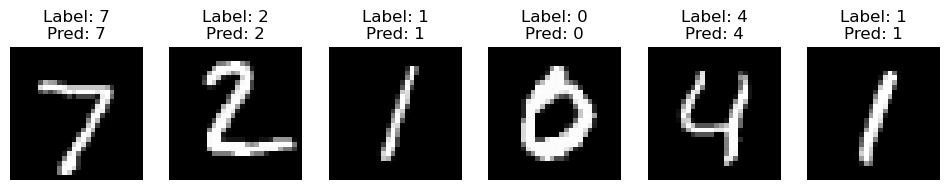

In [8]:
# 6. 可视化测试结果
import matplotlib.pyplot as plt

dataiter = iter(test_loader)
images, labels = next(dataiter)
outputs = model(images)
_, predictions = torch.max(outputs, 1)

fig, axes = plt.subplots(1, 6, figsize=(12, 4))
for i in range(6):
    axes[i].imshow(images[i][0], cmap='gray')
    axes[i].set_title(f"Label: {labels[i]}\nPred: {predictions[i]}")
    axes[i].axis('off')
plt.show()